# ANALYSIS 1: SENTIMENTAL ANALYSIS ON REVIEWS (1999-2014)

Wordcloud of summary section of 'Positive' and 'Negative' Reviews on Amazon.
VADER (Valence Aware Dictionary and Sentiment Reasoner) Sentiment analysis tool was used to calculate the sentiment of reviews.
Sentiment distribution (positive, negative and neutral) across each product along with their names mapped with the product database 'ProductSample.json'.
List of products with most number of positive, negative and neutral Sentiment (3 Different list).
Percentage distribution of positive, neutral and negative in terms of sentiments.
Sentiment distribution across the Year.

In [35]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

In [36]:
file=glob.glob('E:\CapstoneProject\Prime_Pantry.json\Prime_Pantry.json')

Cleaning of 'Prime_Pantry.json' file and importing the data as pandas DataFrame.

In [37]:
# Reading a multiple json files from a single json file 'ReviewSample.json'.
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['overall'],jdata['verified'],jdata['reviewTime'],jdata['reviewerID'],jdata['asin'],jdata['reviewerName'],jdata['reviewText'],jdata['summary'],jdata['unixReviewTime'])) 
    except:
        pass
    
# Creating a dataframe using the list of Tuples got in the previous step.
Selected_Rows=pd.DataFrame(reviewDataframe,columns=['Overall','Verified','Review_Time','Reviewer_ID','Asin','Reviewer_Name','Review_Text','Summary','Unix_Review_Time'])

Function to calculate sentiments using Naive Bayes Analyzer

In [38]:
def NaiveBaiyes_Sentimental(sentence):
    blob = TextBlob(sentence, analyzer=NaiveBayesAnalyzer())
    NaiveBayes_SentimentScore=blob.sentiment.classification
    return NaiveBayes_SentimentScore

Function to calculate sentiments using Vader Sentiment Analyzer

In [39]:
# VADER sentiment analysis tool for getting Compound score.
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [40]:
Selected_Rows=dataset.head(10000)
Selected_Rows['Sentiment_Score']=Selected_Rows['Review_Text'].apply(lambda x: sentimental_Score(x))

Seperating negatives and positives into different dataframes for creating a 'Wordcloud'.

In [41]:
pos = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'pos']
neg = Selected_Rows.loc[Selected_Rows['Sentiment_Score'] == 'neg']

Stemming function for stemming of different form of words which will be used by 'create_Word_Corpus()' function.
PorterStemmer from nltk.stem is used for stemming.

In [42]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

To Generate a word corpus following steps are performed inside the function 'create_Word_Corpus(df)'

Step 1 :- Iterating over the 'summary' section of reviews such that we only get important content of a review.
Step 2 :- Converting the content into Lowercase.
Step 3 :- Using nltk.tokenize to get words from the content.
Step 4 :- Using string.punctuation to get rid of punctuations.
Step 5 :- Using stopwords from nltk.corpus to get rid of stopwords.
Step 6 :- Stemming of Words.
Step 7 :- Finally forming a word corpus and returning the word corpus.

In [43]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df["Summary"]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

Function plot_cloud() to plot cloud

In [44]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

Generate a word cloud image of height=500 and width=900 for positives and negatives

In [45]:
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

Generating a WordCloud of 'Summary' section of Positive Reviews.

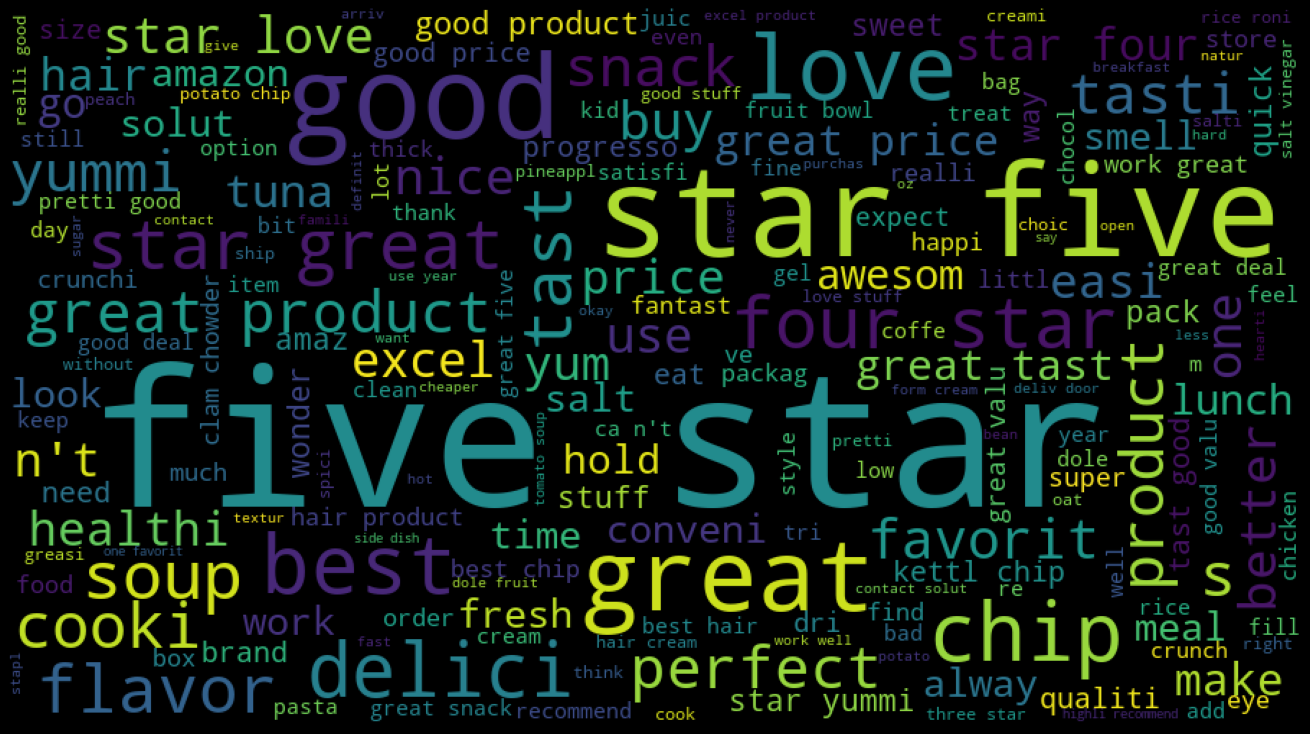

<Figure size 432x288 with 0 Axes>

In [47]:
plot_Cloud(pos_wordcloud)

Generating a WordCloud of 'Summary' section of Negative Reviews.

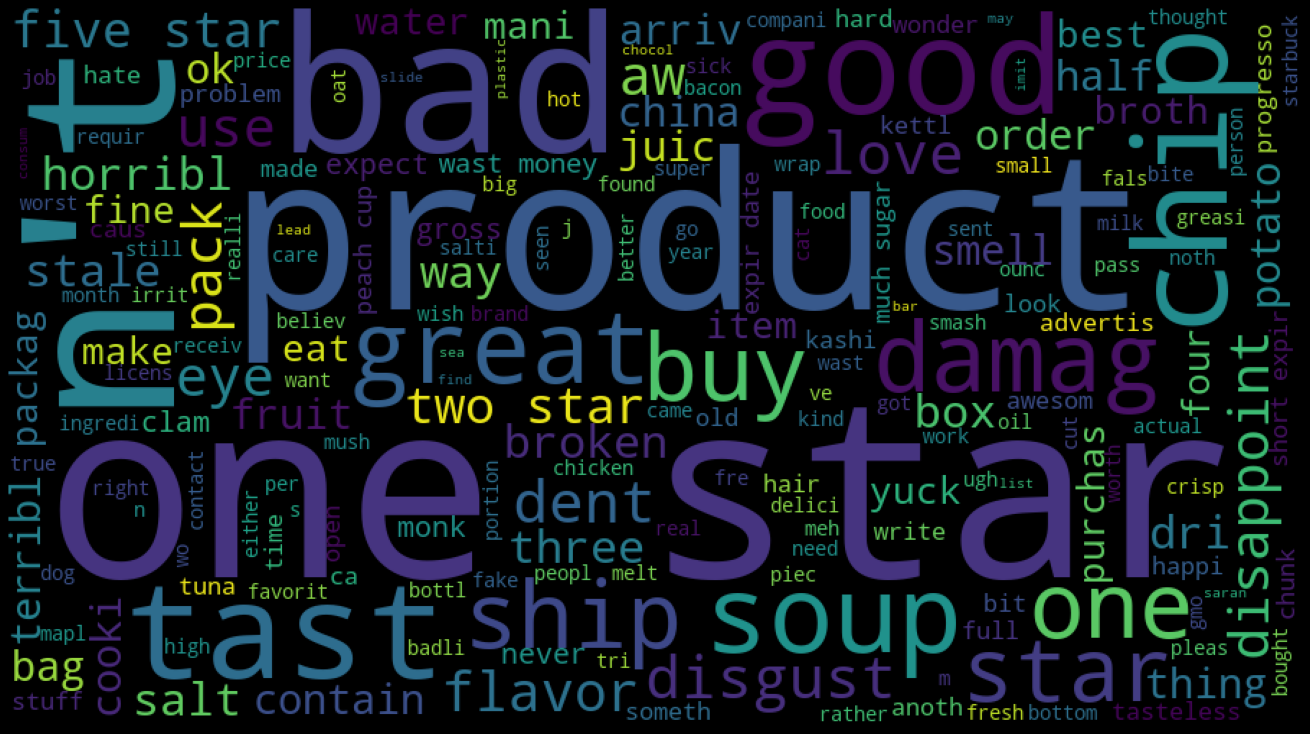

<Figure size 432x288 with 0 Axes>

In [48]:
plot_Cloud(neg_wordcloud)

# SENTIMENT DISTRIBUTION ACROSS EACH PRODUCT ALONG WITH THEIR NAMES MAPPED FROM PRODUCT DATABASE.

Creating a path for product file 'meta_Prime_Pantry.json' which is used to map the product against the 'Asin' to get product 'Title'.

In [49]:
file2=glob.glob('E:\CapstoneProject\meta_Prime_Pantry.json\meta_Prime_Pantry.json')

In [50]:
# Reading a multiple json files from a single json file 'ProductSample.json'.
product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)
        
# Firstly cleaning the data by converting files into proper json format files by some replacements and 
# then Making a list of Tuples containg all the data of json files.        
productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['title'])) 
    except:
        pass
    
# Creating a dataframe using the list of Tuples got in the previous step.     
Product_dataset=pd.DataFrame(productDataframe,columns=['Asin','Title'])

Taking only those columns which are required further down the Analysis such as 'Asin' and 'Sentiment_Score'

In [51]:
Sentimemt_Score_Product=Selected_Rows[['Asin','Sentiment_Score']]

Using Groupby on 'Asin' and 'Sentiment_Score' calculate the count of all the products with positive, negative and neutral sentiment Score

In [52]:
Sentimemt_Score_Product=Sentimemt_Score_Product.groupby(['Asin','Sentiment_Score']).size().reset_index()

DataFrame Manipulations performed to get desired DataFrame.

In [53]:
# Creating a new column with value of 'Sentimemt_Score_Product[0]' so that it is accessible with the index name.
Sentimemt_Score_Product['Count']=Sentimemt_Score_Product[0]

# Taking the Required columns only.
Sentimemt_Score_Product=Sentimemt_Score_Product[['Asin','Sentiment_Score','Count']]

Sorting the rows in the ascending order of 'Asin' and assigning it to 'x1'.

In [55]:
x1=Sentimemt_Score_Product.sort_values(['Asin','Count'],ascending=True).groupby(['Asin']).head()

Products Asin and Title is assigned to x2 which is a copy of DataFrame 'Product_datset'.

In [56]:
x2=Product_dataset

Merging 2 Dataframes 'x1' and 'x2' on common Column 'Asin' to map product 'Title' to respective product 'Asin' using inner type.

In [57]:
result=pd.merge(x2, x1, on='Asin', how='inner')

Taking all the data such as Asin, Title, Sentiment_Score and Count into .csv file

In [58]:
result.to_csv('E:\CapstoneProject\meta_Prime_Pantry.json\Sentiment_Distribution_Across_Product.csv')

# LIST OF PRODUCTS WITH MOST NUMBER OF POSITIVE, NEGATIVE AND NEUTRAL SENTIMENT (3 DIFFERENT LIST).

Segregating reviews based on their Sentiments.

In [59]:
# Selecting the rows whose sentiment is positive
Positive=result[result.Sentiment_Score =='pos']

# Selecting the rows whose sentiment is negative
Negative=result[result.Sentiment_Score =='neg']

# Selecting the rows whose sentiment is neutral
Neutral=result[result.Sentiment_Score =='neu']

Sorting the above result in descending order of count.

In [61]:
result_Positive=Positive.sort_values('Count',ascending=False).reset_index()
result_Negative=Negative.sort_values('Count',ascending=False).reset_index()
result_Neutral=Neutral.sort_values('Count',ascending=False).reset_index()

Droping the unwanted column 'index'.

In [62]:
result_Positive = result_Positive.drop('index', 1)
result_Negative = result_Negative.drop('index', 1)
result_Neutral = result_Neutral.drop('index', 1)

# PERCENTAGE DISTRIBUTION OF POSITIVE, NEUTRAL AND NEGATIVE IN TERMS OF SENTIMENTS.

Getting summation of count column to get the Total count of Reviews under Consideration.

In [64]:
Percentage=result.groupby('Sentiment_Score')['Count'].sum().reset_index()

Percentage calculation taking place and storing the value into a new column 'Percentage'

In [65]:
Percentage['Percentage']=(Percentage.Count/Percentage.Count.sum())*100

Taking all the data such as Sentiment_Score, Count and Percentage into .csv file

In [66]:
Percentage.to_csv('E:\CapstoneProject\meta_Prime_Pantry.json\Sentiment_Percentage.csv')

# SENTIMENT DISTRIBUTION ACROSS THE YEAR

Converting the data type of 'Review_Time' column in the Dataframe 'Selected_Rows' to datetime format.

In [67]:
Percentage=result.groupby('Sentiment_Score')['Count'].sum().reset_index()

Percentage calculation taking place and storing the value into a new column 'Percentage'

In [68]:
Percentage['Percentage']=(Percentage.Count/Percentage.Count.sum())*100

Taking all the data such as Sentiment_Score, Count and Percentage into .csv file

In [69]:
Percentage.to_csv('E:\CapstoneProject\meta_Prime_Pantry.json\Sentiment_Percentage.csv')

# SENTIMENT DISTRIBUTION ACROSS THE YEAR

Converting the data type of 'Review_Time' column in the Dataframe 'Selected_Rows' to datetime format.

In [70]:
Selected_Rows['Review_Time']= pd.to_datetime(Selected_Rows['Review_Time'])

Creating an Addtional column as 'Month' in Datatframe 'Selected_Rows' for Month by taking the month part of 'Review_Time' column.

In [71]:
Selected_Rows['Month']=Selected_Rows['Review_Time'].dt.month

Creating an Addtional column as 'Year' in Datatframe 'Selected_Rows' for Year by taking the year part of 'Review_Time' column.

In [72]:
Selected_Rows['Year']=Selected_Rows['Review_Time'].dt.year

Grouping on the basis of 'Year' and 'Sentiment_Score' to get the respective count.

In [73]:
Sentiment_Year=Selected_Rows.groupby(['Year','Sentiment_Score'])['Asin'].count().reset_index()

Renaming the column 'Asin' to 'count'

In [74]:
Sentiment_Year=Sentiment_Year.rename(columns={'Asin': 'Count'})

Segregating rows based on their Sentiments by year.

In [75]:
Positive_Year = Sentiment_Year[Sentiment_Year.Sentiment_Score == 'pos']
Negative_Year = Sentiment_Year[Sentiment_Year.Sentiment_Score == 'neg']
Neutral_Year = Sentiment_Year[Sentiment_Year.Sentiment_Score == 'neu']

Getting the total count including positive, negative and neutral to get the Total count of Reviews under Consideration for each year.

In [76]:
Sentiment_Total_Year=Sentiment_Year.groupby('Year')['Count'].sum().reset_index()

Renaming the column 'Count' to 'Total_Count'

In [77]:
Sentiment_Total_Year=Sentiment_Total_Year.rename(columns={'Count': 'Total_Count'})

Merging the dataframe with total count to individual sentiment count to get percentage.

In [78]:
result_Positive_Year=pd.merge(Positive_Year, Sentiment_Total_Year, on='Year', how='inner')
result_Negative_Year=pd.merge(Negative_Year, Sentiment_Total_Year, on='Year', how='inner')
result_Neutral_Year=pd.merge(Neutral_Year, Sentiment_Total_Year, on='Year', how='inner')

Calculating Percentage to find a trend for sentiments

In [79]:
result_Positive_Year['Percentage']=(result_Positive_Year['Count']/result_Positive_Year['Total_Count'])*100
result_Negative_Year['Percentage']=(result_Negative_Year['Count']/result_Negative_Year['Total_Count'])*100
result_Neutral_Year['Percentage']=(result_Neutral_Year['Count']/result_Neutral_Year['Total_Count'])*100

Bar-Chart to know the Trend for Percentage of Positive Review over the years based on Sentiments.

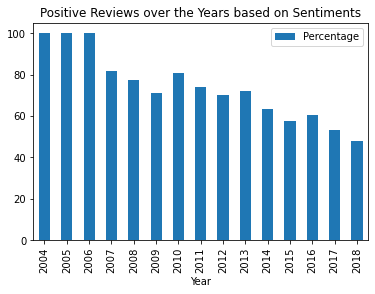

In [81]:
result_Positive_Year.plot(x="Year",y="Percentage",kind="bar",title="Positive Reviews over the Years based on Sentiments")
plt.show()

Bar-Chart to know the Trend for Percentage of Negative Review over the years based on Sentiments.

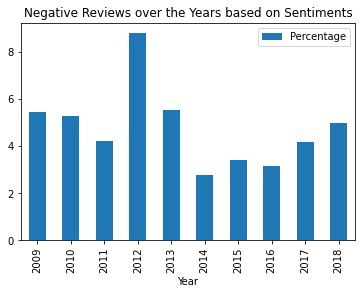

In [82]:
result_Negative_Year.plot(x="Year",y="Percentage",kind="bar",title="Negative Reviews over the Years based on Sentiments")
plt.show()

Bar-Chart to know the Trend for Percentage of Neutral Review over the years based on Sentiments.

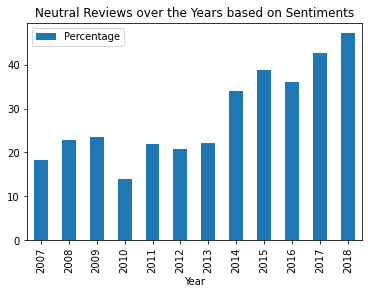

In [83]:
result_Neutral_Year.plot(x="Year",y="Percentage",kind="bar",title="Neutral Reviews over the Years based on Sentiments")
plt.show()